<h1 style="color:white; font-weight:bold;">E-Commerce Customer Churn Prediction</h1>

<h2 style="color:white; font-weight:bold;">Introduction</h2>

In the competitive world of E-commerce, keeping customers is as important as getting new ones. 

Customer churn refers to the phenomenon where customers stop using the company’s products or services. Nowadays, it is one of the main challenges for online businesses. High churn means lost revenue, increased marketing costs, and weakened brand loyalty. That’s why predicting and preventing churn is very important for growth and profitability.


<h2 style="color:white; font-weight:bold;">Project Overview</h2>

<p>In this project, I will conduct an <strong>Exploratory Data Analysis (EDA)</strong> and build <strong>Machine Learning models</strong> using an E-commerce dataset.</p>

<h4 style="color:white; font-weight:bold;">Main Goals:</h4>
<ol>
  <li><strong>Develop a churn prediction model</strong> to uncover patterns and insights about customers who are likely to leave.</li>
  <li><strong>Provide actionable insights</strong> that can help the company retain its customers.</li>
</ol>

<h4 style="color:white; font-weight:bold;">Dataset Description:</h4>
<p>The dataset, sourced from <a href="https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction" style="color:blue;">Kaggle</a>, offers data and statistics of an E-commerce business over the past year. It provides valuable information about the churn rate and can reveal interesting trends and insights that can inform financial and business strategies.</p>

<p>However, a potential limitation is that this dataset is intended for educational purposes and may not represent a real company. Additionally, it does not include data beyond one year or cover different churn segments that might affect the study.</p>


<h2 style="color:white; font-weight:bold;">Libraries</h2>

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import libraries :

import pandas as pd
import numpy as np 
import seaborn as sns

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.colors as colors

from scipy.stats import gaussian_kde

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

<h2 style="color:white; font-weight:bold;">Data Overview</h2>

In [3]:
# Load the dataset 
df = pd.read_excel('/kaggle/input/ecommerce-customer-churn-analysis-and-prediction/E Commerce Dataset.xlsx', sheet_name='E Comm')

df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [5]:
df.shape


(5630, 20)


The dataset has 5630 rows and 20 columns and contains: 

- **Churn:** <br>
0 No, 1 Yes 
- **Numerical Columns:**<br>
Tenure, Warehouse To Home, Hour Spend On App, Order Amount From last Year, Coupon Used, Order Count, Day Since Last Order, Cashback Amount
- **Ordinal Columns:** <br>
CityTier, Satisfaction Score, Complain
- **Nominal Columns:**<br>
Gender, Marital Status, Preferred Login Device, Preferred Payment Mode, Preferred Order Category

<h2 style="color:white; font-weight:bold;">Data Preprocessing</h2>

In [6]:
# #Checking if there are any duplicated rows in the table

df.duplicated().sum()

print("Duplicate rows: " + str(df.duplicated().sum()))

Duplicate rows: 0


As the dataset has no duplicate rows, no further preprocessing is required to remove them.

In [7]:
# Drop unnecessary columns
df.drop(['CustomerID', 'NumberOfDeviceRegistered', 'NumberOfAddress'], axis=1, inplace=True)

# Convert 'Churn' column to boolean
df['Churn'] = df['Churn'].astype(bool)

# Creating an index object of float type columns
float_columns = df.select_dtypes(include=['float']).columns
print()
print("Float columns are: " + ", ".join(float_columns))
print()

# Creating an index object of String type columns
object_columns = df.select_dtypes(include=['object']).columns
print("Object columns are: " + ", ".join(object_columns))
print()

# Creating an index object of Ordinal type columns
ordinal_columns = df[['CityTier','SatisfactionScore', 'Complain' ]].columns
print("Ordinal columns are: " + ", ".join(ordinal_columns))



Float columns are: Tenure, WarehouseToHome, HourSpendOnApp, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder, CashbackAmount

Object columns are: PreferredLoginDevice, PreferredPaymentMode, Gender, PreferedOrderCat, MaritalStatus

Ordinal columns are: CityTier, SatisfactionScore, Complain


In [8]:
# Checking for missing values
missing_values = df.isnull().sum()

# Filter the columns to show only those with missing values
missing_columns = missing_values[missing_values > 0]

print(missing_columns) 

Tenure                         264
WarehouseToHome                251
HourSpendOnApp                 255
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
dtype: int64



The dataset contains a significant amount of missing values, which can affect the churn analysis and predictions.<br>
All of the missing values are numerical data type. Therefore, it is necessary to address them through **median imputation** to ensure accurate and reliable analysis without skewing the statistical information.

In [9]:
#showing statistical summary of the selected columns 
df[float_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
OrderAmountHikeFromlastYear,5365.0,15.707922,3.675485,11.0,13.00,15.00,18.0000,26.00
CouponUsed,5374.0,1.751023,1.894621,0.0,1.00,1.00,2.0000,16.00
OrderCount,5372.0,3.008004,2.939680,1.0,1.00,2.00,3.0000,16.00
DaySinceLastOrder,5323.0,4.543491,3.654433,0.0,2.00,3.00,7.0000,46.00
CashbackAmount,5630.0,177.223030,49.207036,0.0,145.77,163.28,196.3925,324.99


In [10]:
# Calculate the median for each float column
float_medians = df[float_columns].median()

# Fill missing values in float columns with the median
df[float_columns] = df[float_columns].fillna(float_medians)

#showing statistical summary
df[float_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,5630.0,10.134103,8.357951,0.0,3.00,9.00,15.0000,61.00
WarehouseToHome,5630.0,15.566785,8.345961,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5630.0,2.934636,0.705528,0.0,2.00,3.00,3.0000,5.00
OrderAmountHikeFromlastYear,5630.0,15.674600,3.591058,11.0,13.00,15.00,18.0000,26.00
CouponUsed,5630.0,1.716874,1.857640,0.0,1.00,1.00,2.0000,16.00
OrderCount,5630.0,2.961812,2.879248,1.0,1.00,2.00,3.0000,16.00
DaySinceLastOrder,5630.0,4.459325,3.570626,0.0,2.00,3.00,7.0000,46.00
CashbackAmount,5630.0,177.223030,49.207036,0.0,145.77,163.28,196.3925,324.99


In [11]:
# Count the values in descending order for object columns
for i in object_columns:
    print(df[i].value_counts().sort_values(ascending=False))
    print()

PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64

PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64

Gender
Male      3384
Female    2246
Name: count, dtype: int64

PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64

MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64



In [12]:
# Replace values in multiple columns
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace(['Phone', 'Mobile Phone'], 'Mobile')

df['PreferedOrderCat'] = df['PreferedOrderCat'].replace('Mobile Phone', 'Mobile')

df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace({
    'COD': 'Cash on Delivery',
    'CC': 'Credit Card'
})

In [13]:
print(df['PreferredLoginDevice'].value_counts())
print()
print(df['PreferedOrderCat'].value_counts())
print()
print(df['PreferredPaymentMode'].value_counts())

PreferredLoginDevice
Mobile      3996
Computer    1634
Name: count, dtype: int64

PreferedOrderCat
Mobile                2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: count, dtype: int64

PreferredPaymentMode
Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: count, dtype: int64


<h2 style="color:white; font-weight:bold;">Exploratory Data Analysis (EDA)</h2>

<h2 style="color:white; font-weight:bold;">1. Churn</h2>

<h3 style="color:white; font-weight:bold;">1.1 Churn Distribution</h3>

In [14]:
# Calculating churn counts
churn_counts = df['Churn'].value_counts()

# Plotting a pie chart 
labels = ['No', 'Yes']
colors = [px.colors.qualitative.Pastel1[2], px.colors.qualitative.Pastel1[0]]  

fig = px.pie(names=labels, values=churn_counts, title='Churn Distribution',
             labels={'names': 'Churn', 'values': 'Count'}, 
             color_discrete_sequence=colors,
             hover_name=labels,  # Show labels on hover
             hole=0.4)  # Donut hole size (0 for pie, <1 for donut)

# Showing percentage on hover
fig.update_traces(textinfo='percent+label')

# Centering the title
fig.update_layout(title_text='Churn Distribution',
                  title_x=0.5,  # Centered horizontally
                  title_y=0.9,  # Adjust vertical position (0.0 to 1.0 range)
                  title_font_size=20)  # Adjust font size if needed

# Display the plot
fig.show()

The data shows that the majority of customers (**83.2%**) did not churn, while a smaller percentage (**16.8%**) did.

Although the churn rate is relatively low, there is still room for improvement. I will analyze the factors contributing to customer churn and develop strategies to reduce these rates.


<h3 style="color:black; font-weight:bold;">1.2 Churn Dynamics - Nominal </h3>

In [15]:
# Function to split string at capital letters
def split_on_capitals(text):
    new_text = [text[0]]  
    for char in text[1:]:
        if char.isupper():
            new_text.append(' ')
        new_text.append(char)
    return ''.join(new_text).title()


In [16]:
# Initialize a figure
fig = go.Figure()

# Loop through each object column and create a bar chart
for column in object_columns:
    # Count the occurrences of each category and churn combination
    counts = df.groupby([column, 'Churn']).size().reset_index(name='count')
    counts = counts.sort_values(by='count', ascending=False)

    # Calculate total counts for each category
    totals = counts.groupby(column)['count'].sum().reset_index(name='total_count')
    counts = pd.merge(counts, totals, on=column, suffixes=('', '_total'))
    counts['percentage'] = (counts['count'] / counts['total_count']) * 100
    counts['percentage'] = counts['percentage'].apply(lambda x: f"{x:.2f}")
    counts = counts.sort_values(by=[column, 'Churn'], ascending=[True, False])

    # Create a bar chart for the current column
    for churn_value in counts['Churn'].unique():
        churn_counts = counts[counts['Churn'] == churn_value]
        fig.add_trace(
            go.Bar(
                x=churn_counts[column],
                y=churn_counts['count'],
                name='Yes' if churn_value == True else 'No',
                text=churn_counts['percentage'] + '%',
                hoverinfo='text+y',
                marker=dict(color='red' if churn_value == True else 'lightgreen', opacity=0.45),
                hovertemplate=(
                    f'<b>{column}</b>: %{{x}}<br>' +
                    'Number of Customers: %{y}<br>' +
                    'Percentage: %{text}'
                ),
                visible=False,
                showlegend=True
            )
        )

# Make the first set of traces (one for each Churn value) visible by default
num_churn_values = len(df['Churn'].unique())
for trace in fig.data[:num_churn_values]:
    trace.visible = True

# Create dropdown buttons for each trace
buttons = []
for i, column in enumerate(object_columns):
    visibility = [False] * len(fig.data)
    start_idx = i * num_churn_values
    for j in range(num_churn_values):
        visibility[start_idx + j] = True
    buttons.append(dict(
        method='update',
        label=split_on_capitals(column),
        args=[{'visible': visibility},
              {'title': f'{split_on_capitals(column)} by Churn Status',
               'xaxis': {'title': split_on_capitals(column)}}]  # Update x-axis title dynamically
               ))

# Add dropdown menu to the layout
fig.update_layout(
    updatemenus=[dict(
        buttons=buttons,
        direction="down",
        pad={"r": 10, "t": 10},
        showactive=True,
        active=0,
        x=0.80,
        xanchor='left',
        y=1.22,
        yanchor='top'
    )],
    title=f'{split_on_capitals(object_columns[0])} by Churn',
    xaxis_title=split_on_capitals(object_columns[0]),  
    yaxis_title='Number of Customers',
    barmode='overlay',
    legend=dict(
        title='Churn'
    )
)

# Display the plot
fig.show()


<span style="color:white;">**Insights:**</span>


- **Preferred Login Method**: 
  There is no significant difference observed between the categories in terms of preferred login methods.

- **Preferred Payment Method**: 
  Customers paying in cash show a higher churn rate, suggesting a need for targeted retention strategies for this group.

- **Gender**: 
  Despite a larger number of male users, there is no significant difference in churn rates between genders.

- **Preferred Category**: 
  There is a significant churn rate among users who prefer the mobile category. Strategies should be considered to improve retention in this segment.

- **Marital Status**: 
  The single status category shows significant churn rates, indicating the need for different approaches to engage this demographic more effectively.


<h3 style="color:black; font-weight:bold;">1.3 Churn Dynamics - Ordinal </h3>



In [17]:
# Initialize a figure
fig = go.Figure()

# Loop through each ordinal column and create a bar chart
for column in ordinal_columns:
    # Count the occurrences of each category and churn combination
    counts = df.groupby([column, 'Churn']).size().reset_index(name='count')
    counts = counts.sort_values(by='count', ascending=False)

    # Calculate total counts for each category
    totals = counts.groupby(column)['count'].sum().reset_index(name='total_count')
    counts = pd.merge(counts, totals, on=column, suffixes=('', '_total'))
    counts['percentage'] = (counts['count'] / counts['total_count']) * 100
    counts['percentage'] = counts['percentage'].apply(lambda x: f"{x:.2f}")
    counts = counts.sort_values(by=[column, 'Churn'], ascending=[True, False])

    # Create a bar chart for the current column
    for churn_value in counts['Churn'].unique():
        churn_counts = counts[counts['Churn'] == churn_value]
        fig.add_trace(
            go.Bar(
                x=churn_counts[column],
                y=churn_counts['percentage'].astype(float),  # Use percentage for y-values
                name='Yes' if churn_value else 'No',  # Show 'Yes' or 'No' in the legend
                text=churn_counts['percentage'] + '%',
                customdata=churn_counts[['count']].values,  # Pass count values as customdata
                hoverinfo='text+y',
                hovertemplate=(
                    f'<b>{column}</b>: %{{x}}<br>' +
                    'Percentage: %{y:.2f}%<br>' + 
                    'Count: %{customdata[0]}<br>'  # Display count from customdata
                ),
                marker=dict(color='red' if churn_value else 'lightgreen', opacity=0.5),
                visible=False,
                showlegend=True
            )
        )

# Make the first set of traces (one for each Churn value) visible by default
num_churn_values = len(df['Churn'].unique())
for trace in fig.data[:num_churn_values]:
    trace.visible = True

# Create dropdown buttons for each trace
buttons = []
for i, column in enumerate(ordinal_columns):
    visibility = [False] * len(fig.data)
    start_idx = i * num_churn_values
    for j in range(num_churn_values):
        visibility[start_idx + j] = True
    buttons.append(dict(
        method='update',
        label=split_on_capitals(column),
        args=[{'visible': visibility},
              {'title': f'{split_on_capitals(column)} by Churn Status',
               'xaxis': {'title': split_on_capitals(column)},
               'yaxis_title': 'Percentage'}]  # Update y-axis title dynamically
    ))

# Add dropdown menu to the layout
fig.update_layout(
    updatemenus=[dict(
        buttons=buttons,
        direction="down",
        pad={"r": 10, "t": 10},
        showactive=True,
        active=0,
        x=0.80,
        xanchor='left',
        y=1.22,
        yanchor='top'
    )],
    title=f'{split_on_capitals(ordinal_columns[0])} by Churn Status',
    xaxis_title=split_on_capitals(ordinal_columns[0]),  
    yaxis_title='Percentage',
    barmode='group',
    legend=dict(
        title='Churn'  
    ) 
)

# Display the plot
fig.show()


<span style="color:white;">**Insights:**</span>


- **City Tier**:
    The majority of customers are from city tier **1**, and there is a clear trend showing that as the city tier increases, the churn rate also **increases**.

- **Satisfaction Score**:
    Despite high satisfaction scores, the churn rate for those clients remains **high**. This suggests that the feedback system should be modified.

- **Complain**:
    There is a **correlation** between customer complaints and the churn rate.







<h2 style="color:white; font-weight:bold;">2. Numerical Distribution</h2>


In [18]:
import plotly.colors as colors

# Define a color palette
color_palette = colors.qualitative.Plotly

# Create an empty figure
fig = go.Figure()

# Create a trace for each numerical column
for i, column in enumerate(float_columns):
    # Assign a distinct color for each histogram
    hist_color = color_palette[i % len(color_palette)]
    
    # Create histogram trace
    hist = go.Histogram(
        x=df[column],
        histnorm='probability density',
        name=split_on_capitals(column),  # Apply split function here
        opacity=0.75,
        marker=dict(color=hist_color),  # Set the color of the histogram
        hoverinfo='x+name',  # Only show x-axis data in hover text
        visible=False  # Start with all traces hidden
    )
    
    # Add histogram trace
    fig.add_trace(hist)
    
    # Create KDE trace
    kde = gaussian_kde(df[column].dropna())
    x = np.linspace(df[column].min(), df[column].max(), 1000)
    y = kde(x)
    
    kde_trace = go.Scatter(
        x=x,
        y=y,
        mode='lines',
        name=f'{split_on_capitals(column)} KDE',  
        line=dict(color='red'),
        hoverinfo='y+name',  
        showlegend=False,  # Hide KDE trace from legend
        visible=False  # Start with all traces hidden
    )
    
    # Add KDE trace
    fig.add_trace(kde_trace)

# Create buttons for the dropdown menu
buttons = []
for i, column in enumerate(float_columns):
    visible_traces = [False] * (2 * len(float_columns))
    visible_traces[2 * i] = True
    visible_traces[2 * i + 1] = True
    
    buttons.append({
        'label': split_on_capitals(column),  
        'method': 'update',
        'args': [{'visible': visible_traces},
                 {'title': f'Histogram {split_on_capitals(column)}',  
                  'xaxis': {'title': 'Value'},
                  'yaxis': {'title': 'Density'}}]
    })

# Add the dropdown menu to the figure
fig.update_layout(
    updatemenus=[
        {
            'buttons': buttons,
            'direction': 'down',
            'showactive': True
        }
    ],
    title_text='Histogram and KDE of Numerical Columns',
    title_x=0.5,  
    xaxis_title='Value',
    yaxis_title='Density',
    height=600  
)

# Initialize the figure with the first plot visible
fig.data[0].visible = True
fig.data[1].visible = True

# Show the plot
fig.show()


<span style="color:white;">**Insights:**</span>



- **Customer Tenure**: The majority of customers are new users, typically within their first or second year of using the service.

- **Proximity to Warehouses**: Most customers have warehouses located within approximately 20 km of their location.

- **Service Usage**: The majority of customers spend between 2 to 4 hours using the service.

- **Order Frequency**: On average, customers placed approximately 15 orders last year.

- **Coupon Usage**: Most customers use between 1 to 2 coupons.

- **Recent Order Trends**: Last month, the majority of orders were between 1 to 2 in quantity.

- **Purchase Frequency**: Customers typically purchase on the platform within one week.

- **Cashback Amount**: The average cashback amount received by customers is approximately $180.



<h2 style="color:white; font-weight:bold;">3. Bivariate Analysis</h2>


<h3 style="color:white; font-weight:bold;">3.1 Which City Tier has higher Tenure? </h3>



In [19]:
# Box plot
fig = px.box(df, x='CityTier', y='Tenure', color='CityTier', title='Tenure by City Tier',
             labels={'CityTier': 'City Tier', 'Tenure': 'Tenure'})

# Update plot
fig.update_yaxes(range=[-2, 34])

fig.update_layout(
    title={  
        'x':0.5,  
        'xanchor': 'center',
        'yanchor': 'top'
    },
    showlegend=True
)

# Show the plot
fig.show()


<span style="color:#800080;">**Insight:**</span> There is **no** significant difference in tenure across the city tiers.

<h3 style="color:black; font-weight:bold;">3.2 How does the Preferred Order Category correlate with the Hours Spent on the platform?</h3>



In [20]:
# Create preferred categories by hours
hour_by_cat = df[['PreferedOrderCat', 'HourSpendOnApp']].groupby(['PreferedOrderCat', 'HourSpendOnApp']).size().reset_index(name='Total')

#print(hour_by_cat)



# Create a bar plot
fig = px.bar(hour_by_cat, 
             x='HourSpendOnApp', 
             y='Total', 
             color='PreferedOrderCat', 
             barmode='group',
             labels={'HourSpendOnApp': 'Hours', 'Total': 'Customers', 'PreferedOrderCat': 'Preferred Order Category'},
             title='Total Hours on Platform by Preferred Order Category')

# Update layout
fig.update_layout(xaxis=dict(tickmode='linear', dtick=1))
fig.update_layout(title={'x':0.45})

# Show the plot
fig.show()

<span style="color:white;">**Insights:**</span>


- Customers clearly prefer the electronics categories, spending 2-3 hours on them.
- Other categories, such as groceries and fashion, have significantly lower engagement. 
- It is recommended to build strategies for these sections, such as increasing product variety or offering better deals.


<h3 style="color:white; font-weight:bold;">3.3 What is the correlation between Preferred Order Category and Satisfaction Scores?</h3>



In [21]:
# Create preferred categories by satisfaction score
satisfaction_by_cat = df[['PreferedOrderCat', 'SatisfactionScore']].groupby(['PreferedOrderCat', 'SatisfactionScore']).size().reset_index(name='Total')


# Calculate the total count for each category
total_by_cat = df[['PreferedOrderCat', 'SatisfactionScore']].groupby(['PreferedOrderCat']).size().reset_index(name='CategoryTotal')

# Merge the DataFrames
satisfaction_by_cat = satisfaction_by_cat.merge(total_by_cat, on='PreferedOrderCat')

# Calculate the percentage for each row
satisfaction_by_cat['Percentage'] = (satisfaction_by_cat['Total'] / satisfaction_by_cat['CategoryTotal']) * 100

# Display the DataFrame randomly
satisfaction_by_cat.sample(n=5)

,PreferedOrderCat,SatisfactionScore,Total,CategoryTotal,Percentage
15,Mobile,1,418,2080,20.096154
10,Laptop & Accessory,1,446,2050,21.756098
11,Laptop & Accessory,2,212,2050,10.341463
18,Mobile,4,416,2080,20.000000
13,Laptop & Accessory,4,364,2050,17.756098


In [22]:
# Create a bar plot 
fig = px.bar(satisfaction_by_cat, 
             x='SatisfactionScore', 
             y='Total', 
             color='PreferedOrderCat', 
             barmode='group',
             labels={'SatisfactionScore': 'Satisfaction Score', 'Total': 'Customers', 'PreferedOrderCat': 'Preferred Order Category'},
             title='Total Satisfaction Scores by Preferred Order Category',
             hover_data={'Percentage': ':.2f'})

# Update layout to add space between bars
fig.update_layout(xaxis=dict(tickmode='linear', dtick=1))
fig.update_layout(title={'x':0.45})

# Show the plot
fig.show()

<span style="color:white;">**Insights:**</span>

- The majority of customers are **satisfied** with the services.
- However, the percentage of those rating **1** is still **high**.
- The reasons for the high percentage of dissatisfaction should be studied, and improvements should be implemented.

<h3 style="color:white; font-weight:bold;">3.4 Is there a correlation between Users' Satisfaction and their Order Amount?</h3>



In [23]:
# Satisfaction Score by order amount and customer count
satisfaction_by_order = df.groupby('SatisfactionScore').agg(
    TotalOrderAmount=('OrderAmountHikeFromlastYear', 'sum'),
    CustomerCount=('SatisfactionScore', 'size')
).reset_index()

# Total number of customers
total_customers = df['SatisfactionScore'].count()

# Percentage of customers in each group
satisfaction_by_order['CustomerPercentage'] = (satisfaction_by_order['CustomerCount'] / total_customers) * 100

# Order per customer in the group
satisfaction_by_order['OrderPerCustomer'] = satisfaction_by_order['TotalOrderAmount'] / satisfaction_by_order['CustomerCount']

# Display the DataFrame
satisfaction_by_order



,SatisfactionScore,TotalOrderAmount,CustomerCount,CustomerPercentage,OrderPerCustomer
0,1,18587.0,1164,20.674956,15.968213
1,2,9251.0,586,10.408526,15.786689
2,3,26269.0,1698,30.159858,15.470554
3,4,16720.0,1074,19.076377,15.567970
4,5,17421.0,1108,19.680284,15.722924


<span style="color:white;">**Insights:**</span>

- The order amount per customer and the customer percentage from the total are **similar** for satisfaction scores of 1 and 5.<br> This indicates that there is **no linear correlation** between satisfaction score and order amount. 
- It is important to learn why these customers are not satisfied.<br> The order amount suggests that products are selling well, so a study of the supply chain should be conducted.


<h3 style="color:white; font-weight:bold;">3.5 What is the relationship between the amount of Coupon Used and the Order Amount?</h3>



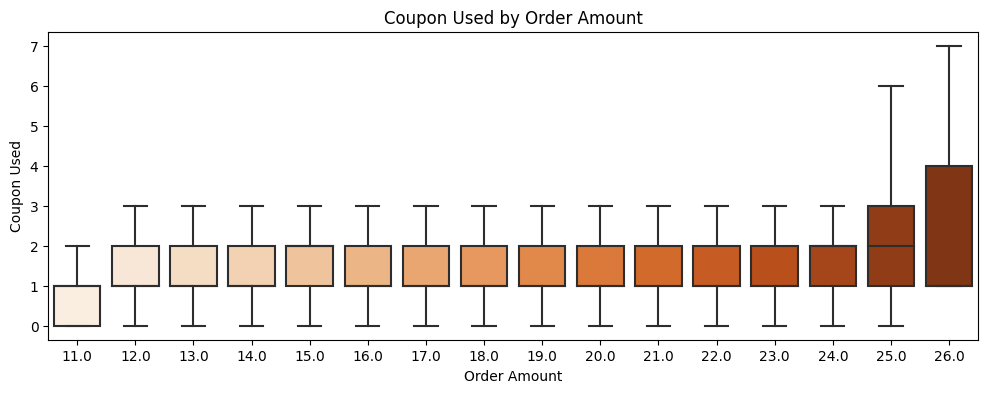

In [24]:
# Color Palette
orange_palette = sns.color_palette("Oranges", n_colors=16)

# Create a box plot 
plt.figure(figsize=(12, 4))
sns.boxplot(x='OrderAmountHikeFromlastYear', y='CouponUsed', data=df, showfliers=False, palette=orange_palette)

plt.xlabel('Order Amount')
plt.ylabel('Coupon Used')
plt.title('Coupon Used by Order Amount')

plt.show()

<span style="color:white;">**Insight:**</span> 
<br>There is **not a strong correlation** between coupon use and order amount, as customers generally use 1-2 coupons on average, regardless of how much they order. Offering more personalized coupons could potentially increase revenue.


<h3 style="color:white; font-weight:bold;">3.6 Is there a connection between the Day of the Last Order and Satisfaction Scores?</h3>



In [25]:
# Satisfaction Score by days since last order
satisfaction_by_days = df.groupby('SatisfactionScore').agg(
    CustomerCount=('SatisfactionScore', 'size'),
    AvgDaysLastOrder=('DaySinceLastOrder', 'mean')
).reset_index()

# Display the DataFrame
satisfaction_by_days


,SatisfactionScore,CustomerCount,AvgDaysLastOrder
0,1,1164,4.408935
1,2,586,4.339590
2,3,1698,4.336867
3,4,1074,4.434823
4,5,1108,4.787004


<span style="color:white;">**Insights:**</span>

- Ideally, the average days since the last order should be lower as the satisfaction score increases.<br>
However, the **average** across satisfaction scores remains **the same.**
- Strategies to motivate higher satisfaction scores should be considered.

<h3 style="color:white; font-weight:bold;">3.7 Is there a connection between CashBack incentives and customer Complaints?</h3>


In [26]:
# Define bins 
bins = list(range(0, 351, 25)) 
labels = [f'{i}-{i+25}' for i in bins[:-1]]  

# A Series for the binning results
cashback_groups_series = pd.cut(df['CashbackAmount'], bins=bins, labels=labels, right=False)

# Combine the Series with the DataFrame for grouping
combined_df = pd.DataFrame({'CashbackGroup': cashback_groups_series, 'Complain': df['Complain']})

# Cashback groups by Churn 
cashback_by_copmlain = combined_df.groupby(['CashbackGroup', 'Complain']).size().reset_index(name='Count')

# Total for each group
total_counts = cashback_by_copmlain.groupby('Complain')['Count'].sum().reset_index(name='TotalCount')

# Merge the DataFrames
cashback_by_copmlain = cashback_by_copmlain.merge(total_counts, on='Complain')

# Calculate percentage 
cashback_by_copmlain['Percentage'] = (cashback_by_copmlain['Count'] / cashback_by_copmlain['TotalCount']) * 100

# Pivot the table to get a more readable format
cashback_by_copmlain_pivot = cashback_by_copmlain.pivot(index='CashbackGroup', columns='Complain', values=['Count', 'Percentage']).fillna(0).reset_index()
cashback_by_copmlain_pivot['Count'] = cashback_by_copmlain_pivot['Count'].astype(int)
cashback_by_copmlain_pivot['Percentage'] = cashback_by_copmlain_pivot['Percentage'].round(2)

print(cashback_by_copmlain_pivot)



         CashbackGroup Count      Percentage       
Complain                   0    1          0      1
0                 0-25     4    1       0.10   0.06
1                25-50     4    1       0.10   0.06
2                50-75     0    1       0.00   0.06
3               75-100     0    1       0.00   0.06
4              100-125   292  140       7.25   8.73
5              125-150  1034  398      25.68  24.81
6              150-175  1159  432      28.79  26.93
7              175-200   600  240      14.90  14.96
8              200-225   304  119       7.55   7.42
9              225-250   182  100       4.52   6.23
10             250-275   138   69       3.43   4.30
11             275-300   193   62       4.79   3.87
12             300-325   116   40       2.88   2.49
13             325-350     0    0       0.00   0.00


In [27]:
# Complain column As boolean For readability
cashback_by_copmlain['Complain'] = cashback_by_copmlain['Complain'].astype(bool)

# Create a bar plot 
fig = px.bar(cashback_by_copmlain, 
             x='CashbackGroup', 
             y='Percentage', 
             color='Complain', 
             barmode='group', 
             color_discrete_map={False: 'lightgreen', True: 'red'}, 
             labels={'CashbackGroup': 'Cashback Group', 'Percentage': 'Percentage', 'Complain': 'Complain'},
             title='Cashback Percentage by Complain',
             hover_data={'CashbackGroup': True, 'Percentage': ':,.2f', 'Complain': False})  # Format Percentage to 2 decimals


fig.for_each_trace(lambda trace: trace.update(name='Yes' if trace.name == 'True' else 'No'))

# Update layout
fig.update_layout(
    xaxis_title='Cashback Groups',
    yaxis_title='Percentage',
    barmode='group',
    title={'x':0.45}
)

# Show plot
fig.show()


<span style="color:white;">**Insight:**</span> 
<br>There is **no linear correlation** between cashback amount and complains. In both groups, the distribution of cashback shows **similar trends**, suggesting that cashback amount may not directly affect churn but could be an additional factor in customer engagement.

<h3 style="color:white; font-weight:bold;">3.8 Do lower Satisfaction Scores correlate with more Complaints?
</h3>

In [28]:
#Satisfaction Score by Complain
satisfaction_by_complain = df.groupby('SatisfactionScore').agg(
    TotalCustomers=('SatisfactionScore', 'size'),
    TotalComplaints=('Complain', 'sum')
).reset_index()

# Calculate percentage 
satisfaction_by_complain['ComplaintPercentage'] = (satisfaction_by_complain['TotalComplaints'] / satisfaction_by_complain['TotalCustomers']) * 100

# # Display the DataFrame
print(satisfaction_by_complain)

   SatisfactionScore  TotalCustomers  TotalComplaints  ComplaintPercentage
0                  1            1164              372            31.958763
1                  2             586              170            29.010239
2                  3            1698              472            27.797409
3                  4            1074              268            24.953445
4                  5            1108              322            29.061372


In [29]:
blue_shades = ['#E3F2FD', '#90CAF9', '#42A5F5', '#1E88E5', '#1976D2']

# Create a histogram plot
fig = go.Figure()

fig.add_trace(go.Bar(
    x=satisfaction_by_complain['SatisfactionScore'],
    y=satisfaction_by_complain['ComplaintPercentage'],
    marker=dict(
        color=blue_shades  
    )
))

# Update layout
fig.update_layout(
    title={
        'text': 'Complaints by Satisfaction Score',
        'x': 0.5, 
        'xanchor': 'center'  
    },
    xaxis_title='Satisfaction Score',
    yaxis_title='Percentage',
    xaxis=dict(tickmode='linear'),
    yaxis=dict(range=[0, 40]),
    plot_bgcolor='rgba(0, 0, 0, 0)', 
    bargap=0.15
)

# Show plot
fig.show()


<span style="color:white;">**Insights:**</span>

- There is **mild correlation** between satisfaction score and complaints.
- Ideally, a higher satisfaction score would correspond to a lower percentage of complaints, reflecting the impact of satisfaction on complaints. Since the percentage of complaints remains high, analyzing complaints further is recommended.

<h3 style="color:white; font-weight:bold;">3.9 Does Distance between the warehouse and home affect the Order Amount? </h3>

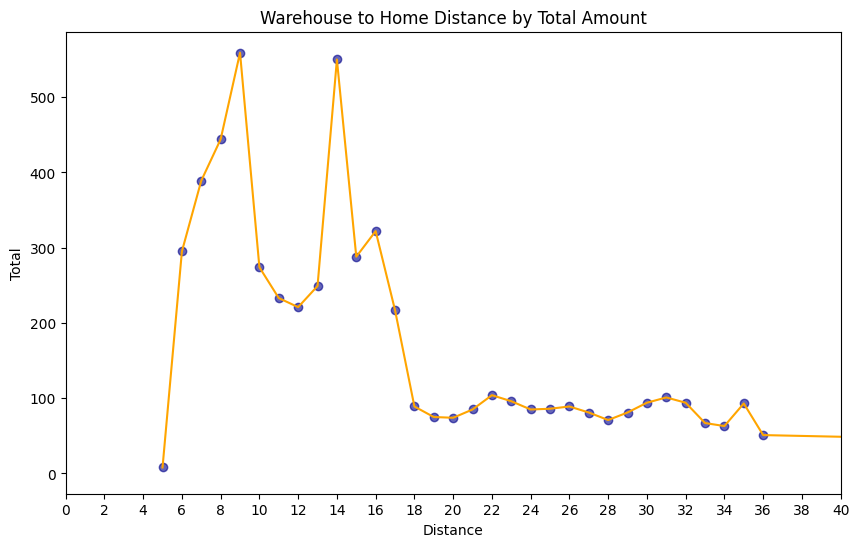

In [30]:
#Warehouse To Home count
warehouse_to_home = df['WarehouseToHome'].value_counts().reset_index()
warehouse_to_home.columns = ['WarehouseToHome', 'Count']
warehouse_to_home = warehouse_to_home.sort_values('WarehouseToHome')

# Create a scatter and line plot
plt.figure(figsize=(10, 6))
plt.scatter(warehouse_to_home['WarehouseToHome'], warehouse_to_home['Count'], alpha=0.6, color='darkblue')
plt.plot(warehouse_to_home['WarehouseToHome'], warehouse_to_home['Count'], linestyle='-', color='orange')

plt.xlabel('Distance')
plt.ylabel('Total')
plt.title('Warehouse to Home Distance by Total Amount')
plt.grid(which='both', linestyle='None')

# Set x-axis range and ticks
plt.xlim(0, 40)
plt.xticks(range(0, 41, 2))

plt.show()

<span style="color:white;">**Insights:**</span>

- The majority of customers are located between **6 to 16 km** away. As the distance **increases**, the number of customers **decreases**.
- Distance appears to be a **significant factor** in customer decisions. 
- Expanding warehouse locations to cover a larger area could potentially increase sales and revenue.

<h2 style="color:white; font-weight:bold;"> Machine Learning</h2>

<h3 style="color:white; font-weight:bold;"> Data Preparation</h3>


In [31]:
# Define features and target variable
X = df.drop('Churn', axis=1)
y = df['Churn']

<h3 style="color:white; font-weight:bold;"> Encoding</h3>




In [32]:
# Categorical and Numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=['int', 'float']).columns

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

<h3 style="color:; fonwhitet-weight:bold;"> Split Data</h3>


In [33]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

<h3 style="color:white; font-weight:bold;"> Dimensionality Reduction</h3>


In [34]:
# Standarize the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Apply PCA (Principal Component Analysis) to reduce dimensionality
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_
explained_variance

array([1.11709798e-01, 7.45347505e-02, 7.21802742e-02, 6.91454724e-02,
       6.16805309e-02, 5.65099485e-02, 5.49402474e-02, 4.78717826e-02,
       4.50389662e-02, 4.23931637e-02, 4.02380818e-02, 3.90350849e-02,
       3.87646417e-02, 3.65916972e-02, 3.60239274e-02, 3.44709828e-02,
       3.21587678e-02, 2.96440799e-02, 2.41228322e-02, 2.19800088e-02,
       1.70876868e-02, 1.15352415e-02, 2.34203270e-03, 2.20308731e-32,
       4.41958814e-33, 3.92923758e-33, 2.09975184e-33, 1.79968803e-33])

<span style="color:white;">**Conclusion:**</span><br>

Applying **PCA** will **not enhance** the performance of the models; it leads to unnecessary complexity and results in a loss of important information.<br> The **original** features provide **better predictive** power, indicating that PCA reduction will not benefit the models.

<h3 style="color:white; font-weight:bold;"> Model Selection</h3>

In [35]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

<h3 style="color:white; font-weight:bold;">1. Logistic Regression <h3>

In [36]:
# Logistic Regression Model
model_lr = LogisticRegression(random_state=42)

# Train the model
model_lr.fit(X_train, y_train)

# Make predictions
y_pred = model_lr.predict(X_test)

In [37]:
print('Classification Report')
print("-----------------------")
print()
print(classification_report(y_test, y_pred))
print()

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=True)  
recall = recall_score(y_test, y_pred, pos_label=True)        
f1 = f1_score(y_test, y_pred, pos_label=True)                
roc_auc = roc_auc_score(y_test, model_lr.predict_proba(X_test)[:, 1])

print('Logistic Regression')
print("---------------------")
print(f'Accuracy:   {accuracy: .4f}')
print(f'Precision:   {precision:.4f}')
print(f'Recall:      {recall:.4f}')
print(f'F1 Score:    {f1:.4f}')
print(f'ROC AUC:     {roc_auc:.4f}')




Classification Report
-----------------------

              precision    recall  f1-score   support

       False       0.90      0.98      0.94       941
        True       0.79      0.46      0.59       185

    accuracy                           0.89      1126
   macro avg       0.85      0.72      0.76      1126
weighted avg       0.88      0.89      0.88      1126


Logistic Regression
---------------------
Accuracy:    0.8917
Precision:   0.7890
Recall:      0.4649
F1 Score:    0.5850
ROC AUC:     0.8804


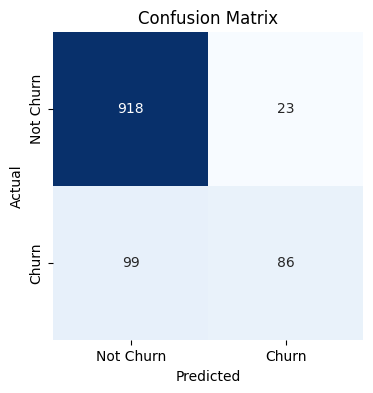

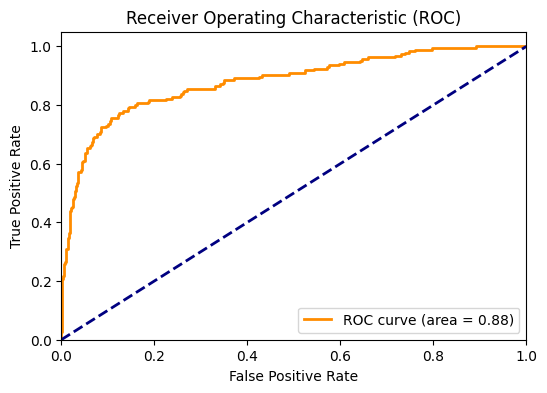

In [38]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Not Churn', 'Churn'], 
            yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print()
print()

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, model_lr.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


<h3 style="color:white; font-weight:bold;">2. Decision Tree <h3>

In [39]:
# Decision Tree Model
model_dt = DecisionTreeClassifier(random_state=42)

# Train the model
model_dt.fit(X_train, y_train)

# Make predictions
y_pred = model_dt.predict(X_test)

In [40]:
# Print classification report
print('Classification Report')
print("-----------------------")
print()
print(classification_report(y_test, y_pred))
print()

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=True)
recall = recall_score(y_test, y_pred, pos_label=True)
f1 = f1_score(y_test, y_pred, pos_label=True)
roc_auc = roc_auc_score(y_test, model_dt.predict_proba(X_test)[:, 1])

print('Decision Tree')
print("---------------------")
print(f'Accuracy:   {accuracy: .4f}')
print(f'Precision:   {precision:.4f}')
print(f'Recall:      {recall:.4f}')
print(f'F1 Score:    {f1:.4f}')
print(f'ROC AUC:     {roc_auc:.4f}')


Classification Report
-----------------------

              precision    recall  f1-score   support

       False       0.98      0.98      0.98       941
        True       0.88      0.90      0.89       185

    accuracy                           0.96      1126
   macro avg       0.93      0.94      0.93      1126
weighted avg       0.96      0.96      0.96      1126


Decision Tree
---------------------
Accuracy:    0.9627
Precision:   0.8783
Recall:      0.8973
F1 Score:    0.8877
ROC AUC:     0.9364


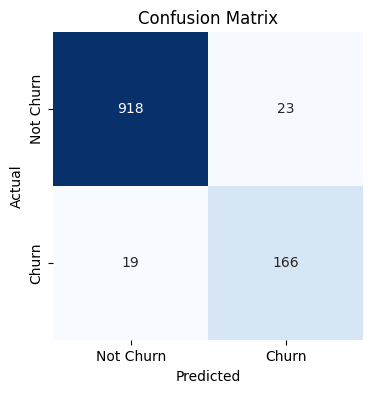

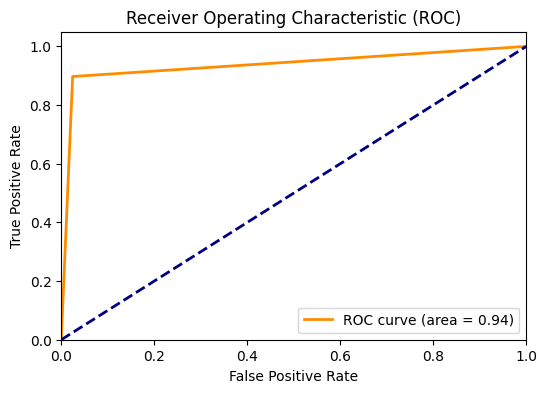

In [41]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Not Churn', 'Churn'], 
            yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print()
print()

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, model_dt.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

<h3 style="color:white; font-weight:bold;">3. Random Forest <h3>

In [42]:
# Random Forest Model
model_rf = RandomForestClassifier(random_state=42)

# Train the model
model_rf.fit(X_train, y_train)

# Make predictions
y_pred = model_rf.predict(X_test)

In [43]:
print('Classification Report')
print("-----------------------")
print()
print(classification_report(y_test, y_pred))
print()

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=True)  
recall = recall_score(y_test, y_pred, pos_label=True)        
f1 = f1_score(y_test, y_pred, pos_label=True)                
roc_auc = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1])

print('Random Forest')
print("---------------------")
print(f'Accuracy:   {accuracy: .4f}')
print(f'Precision:   {precision:.4f}')
print(f'Recall:      {recall:.4f}')
print(f'F1 Score:    {f1:.4f}')
print(f'ROC AUC:     {roc_auc:.4f}')




Classification Report
-----------------------

              precision    recall  f1-score   support

       False       0.97      1.00      0.98       941
        True       0.98      0.83      0.90       185

    accuracy                           0.97      1126
   macro avg       0.97      0.91      0.94      1126
weighted avg       0.97      0.97      0.97      1126


Random Forest
---------------------
Accuracy:    0.9689
Precision:   0.9808
Recall:      0.8270
F1 Score:    0.8974
ROC AUC:     0.9869


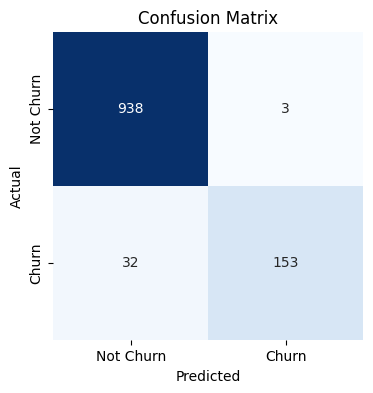

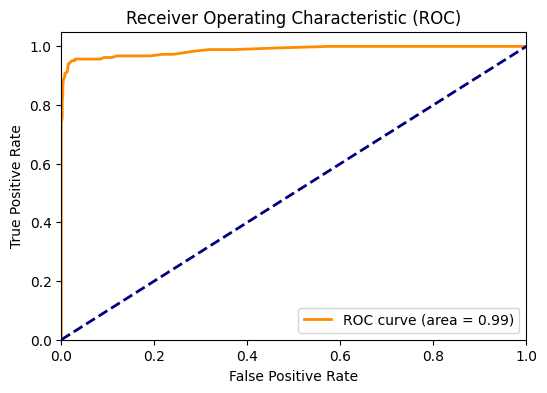

In [44]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Not Churn', 'Churn'], 
            yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print()
print()

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, model_rf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

<h3 style="color:white; font-weight:bold;">4. XGBoost <h3>

In [45]:
# XGBoost model
model_xgb = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model
model_xgb.fit(X_train, y_train)

# Make predictions
y_pred = model_xgb.predict(X_test)

In [46]:
print('Classification Report')
print("-----------------------")
print()
print(classification_report(y_test, y_pred))
print()

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=True)
recall = recall_score(y_test, y_pred, pos_label=True)
f1 = f1_score(y_test, y_pred, pos_label=True)
roc_auc = roc_auc_score(y_test, model_xgb.predict_proba(X_test)[:, 1])


print('XGBoost')
print("---------------------")
print(f'Accuracy:   {accuracy: .4f}')
print(f'Precision:   {precision:.4f}')
print(f'Recall:      {recall:.4f}')
print(f'F1 Score:    {f1:.4f}')
print(f'ROC AUC:     {roc_auc:.4f}')


Classification Report
-----------------------

              precision    recall  f1-score   support

       False       0.98      1.00      0.99       941
        True       0.98      0.89      0.93       185

    accuracy                           0.98      1126
   macro avg       0.98      0.94      0.96      1126
weighted avg       0.98      0.98      0.98      1126


XGBoost
---------------------
Accuracy:    0.9796
Precision:   0.9821
Recall:      0.8919
F1 Score:    0.9348
ROC AUC:     0.9808


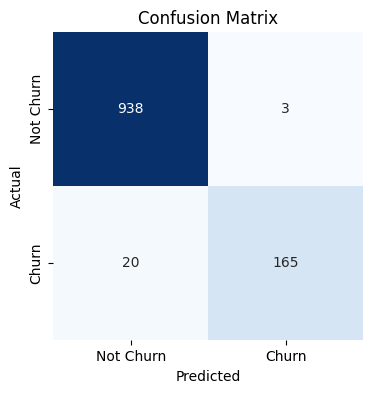

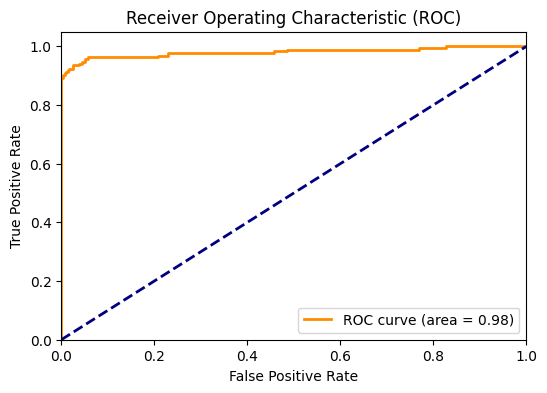

In [47]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Not Churn', 'Churn'], 
            yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print()
print()

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, model_xgb.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

<span style="color:white;">**Conclusion:**</span><br>

The classification models predict with **good accuracy**. Customers who are at risk of churn can be identified, allowing actions to be implemented to keep them engaged.


<h2 style="color:white; font-weight:bold;"> Recommendations</h2>

This project provided valuable insights into customer behavior and factors influencing churn within the E-commerce sector. Through detailed analysis, several important patterns and trends were identified, leading to actionable recommendations for improving customer retention and overall business performance.


- **Expand Warehouse Coverage**: To better serve customers and reduce the impact of distance on purchasing decisions, consider expanding warehouse locations to cover larger areas.

- **Customer Feedback Systems**: Analyzing complaints and feedback will help identify areas that need improvement.

- **Targeted Promotions**: Strategies to increase frequent orders, such as personalized coupons and optimized cashback, should be considered.

- **Product Category Improvement**: Enhancing less popular categories by increasing product variety or offering better deals could drive higher customer engagement and diversify sales.

- **Address Churn Customers**: Investigate the reasons behind high churn rates among satisfied customers and develop targeted strategies to address these issues.

- **Incentivize Frequent Purchases**: Introduce loyalty programs or incentives that encourage more frequent purchases, particularly from customers with high satisfaction scores.

- **Improve Supply Chain Efficiency**: Ensuring that products are delivered on time and in good condition could help reduce dissatisfaction and boost repeat purchases.

